# Análisis Exploratorio de Datos : Accesos a Servicio de Internet 

### Índice
1. [Descripción de los datos ](#id1)
2. [Análisis de Nulos y Outliers](#id2)
3. [EDA Variables Catégoricas](#id3)
4. [EDA Variables Numéricas](#id4)
5. [Generación de Insights](#id5)
6. [Fuentes adicionales](#id6)

### 1. Descripción de los datos<a name="id1"></a>
Se describen la cantidad de registros y columnas con sus tipos de datos, ocupación en memoria y una estadística descriptiva de los mismos: cúal es el promedio, el desvío estandar, los cuartiles, todos medidas de tendencia central.

In [26]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Cargar el dataframe 'df' desde el archivo CSV 'Internet_limpio.csv'
df = pd.read_csv("../Datasets/Internet_limpio.csv", sep=",")

In [28]:
# Mostrar las primeras filas del dataframe
df.head()

,Anio,Trimestre,Provincia,ADSL,Cablemodem,fibra_optica,Wireless,otras_tecnologias,accesos_hogares,banda_ancha,dial_up,velocidad_512kpbs,velocidad_1Mbps,velocidad_6Mbps,velocidad_10Mbps,velocidad_20Mbps,velocidad_30Mbps,velocidad_mas30Mbps,velocidad_otros,velocidad_bajada
0,2022,4,Buenos Aires,326,3,1,130,72,7894,5,6.0,28.934,23.347,259.866,281.550,244.555,98.670,3760.109,97.634,111.000
1,2022,4,Capital Federal,139,1,139,5,32,12273,2,2.0,516.000,5.096,31.320,64.653,36.336,8.116,1299.117,106.772,18.286
2,2022,4,Catamarca,9,11,47,1,2,6577,71,1.0,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,8.333
3,2022,4,Chaco,25,61,47,8,3,4362,144,5.0,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,10.402
4,2022,4,Chubut,45,74,10,31,9,8557,168,904.0,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,1.592


In [29]:
# Verificar los tipos de datos de cada columna y realizar conversiones necesarias si es necesario
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Anio                 864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   ADSL                 864 non-null    int64  
 4   Cablemodem           864 non-null    int64  
 5   fibra_optica         864 non-null    int64  
 6   Wireless             864 non-null    int64  
 7   otras_tecnologias    864 non-null    int64  
 8   accesos_hogares      864 non-null    int64  
 9   banda_ancha          864 non-null    int64  
 10  dial_up              862 non-null    float64
 11  velocidad_512kpbs    864 non-null    float64
 12  velocidad_1Mbps      864 non-null    float64
 13  velocidad_6Mbps      864 non-null    float64
 14  velocidad_10Mbps     864 non-null    float64
 15  velocidad_20Mbps     864 non-null    flo

In [30]:
# Convertir la columna 'Provincia' a tipo categórico
df['Provincia'] = df['Provincia'].astype('category')

### 2. Análisis de Nulos y Outliers<a name="id2"></a>
#### Análisis de Nulos

In [31]:
# Averiguamos si existen valores nulos
df.isna().sum().sort_values(ascending = False)

velocidad_otros        6
dial_up                2
Trimestre              0
velocidad_mas30Mbps    0
velocidad_30Mbps       0
velocidad_20Mbps       0
velocidad_10Mbps       0
velocidad_6Mbps        0
velocidad_1Mbps        0
velocidad_512kpbs      0
Anio                   0
banda_ancha            0
accesos_hogares        0
otras_tecnologias      0
Wireless               0
fibra_optica           0
Cablemodem             0
ADSL                   0
Provincia              0
velocidad_bajada       0
dtype: int64

Conclusión:
velocidad_otros y dial_up tiene algunos valores nulos --> se reemplazarán con ceros.

In [32]:
# Reemplazar valores nulos con ceros en la columna 'velocidad_otros'
df['velocidad_otros'] = df['velocidad_otros'].fillna(0)

# Reemplazar valores nulos con ceros en la columna 'dial_up'
df['dial_up'] = df['dial_up'].fillna(0)

#### Análisis de Outliers

Filas con valores atípicos:
     Anio  Trimestre        Provincia  accesos_hogares
1    2022          4  Capital Federal            12273
25   2022          3  Capital Federal            12228
49   2022          2  Capital Federal            12131
481  2017          4  Capital Federal            12290
505  2017          3  Capital Federal            12186
529  2017          2  Capital Federal            12406
577  2016          4  Capital Federal            12063
601  2016          3  Capital Federal            12077
625  2016          2  Capital Federal            12004


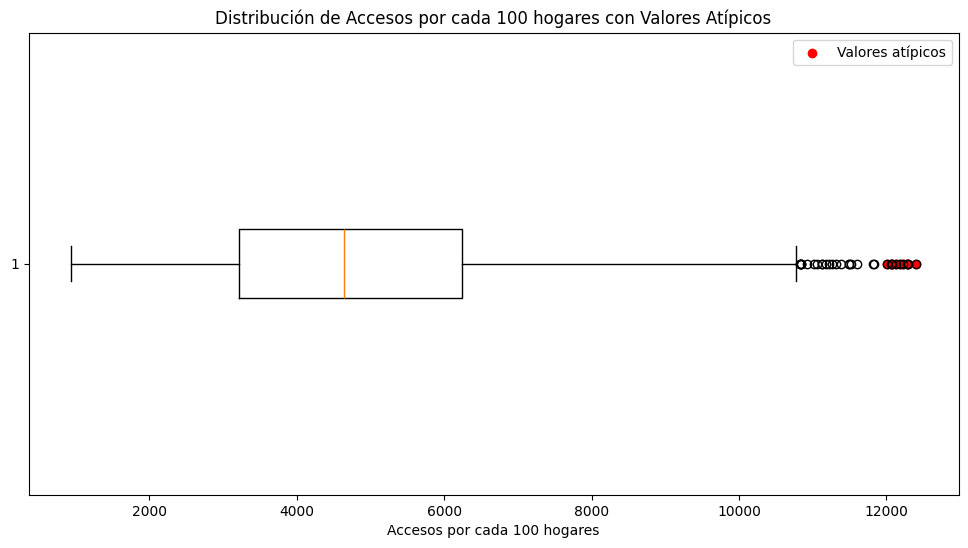

In [33]:
# Calcular los z-scores para la columna 'Accesos por cada 100 hogares'
df['zscore'] = (df['accesos_hogares'] - df['accesos_hogares'].mean()) / df['accesos_hogares'].std()

# Identificar valores atípicos basados en los z-scores
outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

# Imprimir las filas del dataframe 'df' que contienen valores atípicos
columnas_deseadas = ['Anio', 'Trimestre', 'Provincia', 'accesos_hogares']
outliers = outliers[columnas_deseadas]
print("Filas con valores atípicos:")
print(outliers)

# Visualizar los valores atípicos mediante un diagrama de caja (box plot)
plt.figure(figsize=(12, 6))
plt.boxplot(df['accesos_hogares'], vert=False)
plt.scatter(outliers['accesos_hogares'], [1] * len(outliers), color='red', label='Valores atípicos')
plt.xlabel('Accesos por cada 100 hogares')
plt.title('Distribución de Accesos por cada 100 hogares con Valores Atípicos')
plt.legend()
plt.show()


Conclusión:<br>
Según este análisis encontramos ciertos 'valores atipicos', pero al tratarse de la provincia 'Capital Federal' los mantenemos como válidos ya que se puede deducir que en la citada provincia es posible que se presente este tipo de valores por el número de hogares con acceso a Internet que tiene.

### 3. EDA Variables Catégoricas<a name="id3"></a>

In [34]:
df.select_dtypes(include='category')

,Provincia
0,Buenos Aires
1,Capital Federal
2,Catamarca
3,Chaco
4,Chubut
...,...
859,Santa Cruz
860,Santa Fe
861,Santiago Del Estero
862,Tierra Del Fuego


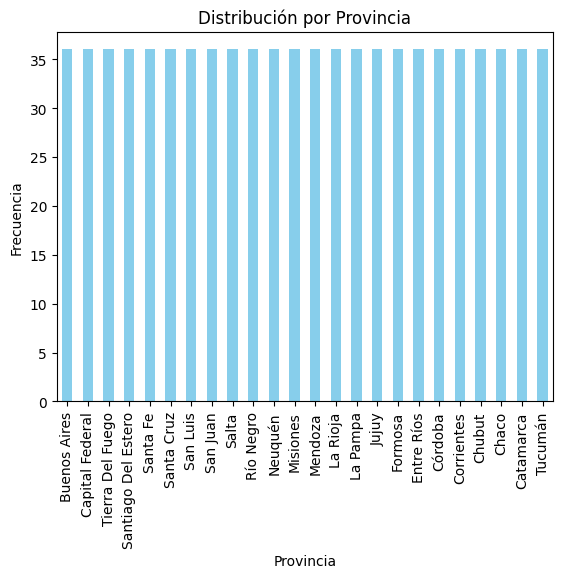

In [35]:
# Crear un gráfico de subgráficos para la columna categórica 'Provincia'
fig, ax = plt.subplots()

# Contar la frecuencia de cada categoría en la columna 'Provincia'
conteo_provincias = df['Provincia'].value_counts()

# Graficar la distribución de provincias
conteo_provincias.plot(kind='bar', ax=ax, color='skyblue')

# Personalizar el gráfico
ax.set_title('Distribución por Provincia')
ax.set_xlabel('Provincia')
ax.set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Conclusiones:

El gráfico muestra que la columna 'Provincia' tiene el mismo número de valores para cada provincia analizada.

### 4. EDA Variables Numéricas<a name="id4"></a>

In [36]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [37]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Anio,864.0,2.018000e+03,2018.000000,2.583484,2014.00000,2016.000000,2018.000000,2020.000000,2022.000000
Trimestre,864.0,2.500000e+00,2.500000,1.118682,1.00000,1.750000,2.500000,3.250000,4.000000
ADSL,864.0,8.636343e+01,46.000000,116.431490,1.00000,21.000000,46.000000,81.000000,720.000000
Cablemodem,864.0,1.032917e+02,35.500000,188.849172,0.00000,9.000000,35.500000,72.250000,999.000000
fibra_optica,864.0,1.654329e+02,25.000000,266.807807,0.00000,9.000000,25.000000,170.750000,998.000000
Wireless,864.0,5.777778e+01,10.000000,156.015038,0.00000,4.000000,10.000000,26.000000,952.000000
otras_tecnologias,864.0,1.027130e+02,15.000000,207.418981,1.00000,3.000000,15.000000,47.000000,987.000000
accesos_hogares,864.0,4.962030e+03,4639.000000,2331.914988,935.00000,3222.000000,4639.000000,6244.250000,12406.000000
banda_ancha,864.0,1.373264e+02,90.500000,180.812265,1.00000,39.000000,90.500000,143.000000,987.000000
dial_up,864.0,1.502465e+02,15.500000,230.014490,0.00000,2.000000,15.500000,248.500000,998.000000


Conclusiones:

velocidad_otros	contiene algunos valores negativos --> reemplazar los negativos con cero.
Las demás columnas tienen datos aceptables para continuar nuestro análisis.

In [13]:
# Filtrar valores negativos en la columna 'velocidad_otros'
valores_negativos = df['velocidad_otros'] < 0

# Reemplazar los valores negativos con cero
df.loc[valores_negativos, 'velocidad_otros'] = 0

### 5. Generación de Insights<a name="id5"></a>

#### Distribución de la columna 'Accesos por cada 100 hogares'

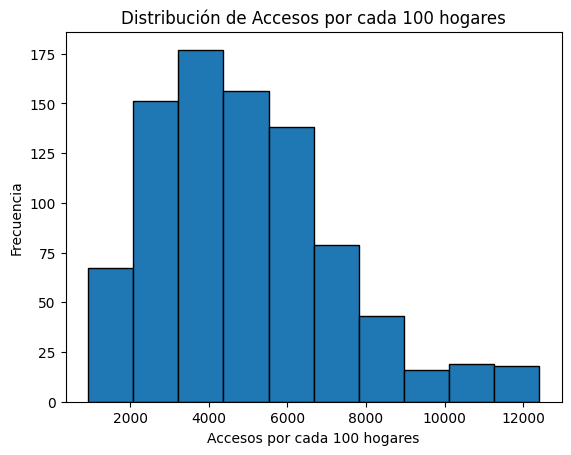

In [39]:
# Analizar la distribución de la columna 'Accesos por cada 100 hogares' utilizando un histograma.
plt.hist(df['accesos_hogares'], bins=10, edgecolor='black')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.title('Distribución de Accesos por cada 100 hogares')
plt.show()


En el gráfico se observa que mayor frecuancia de valores se encuentra aproximadamente en 4,000 accesos y las menores frecuecnias están entre 10,000 y 12,000 aproximados.

#### Relación entre 'Accesos por cada 100 hogares' y 'Provincia'

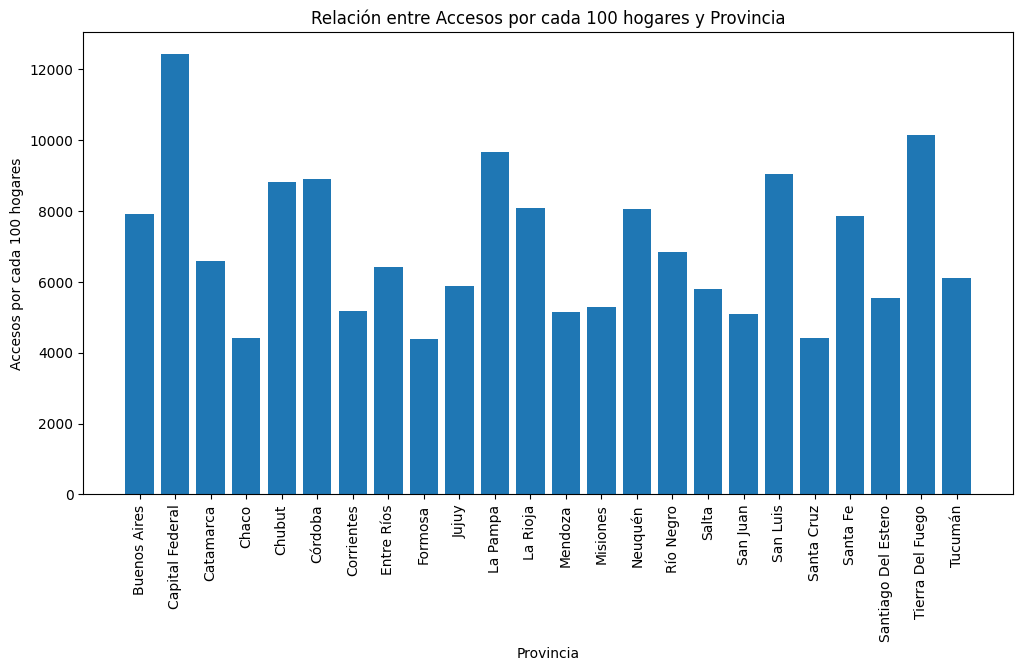

In [40]:

# Analizar la relación entre 'Accesos por cada 100 hogares' y 'Provincia' utilizando un gráfico de barras.
plt.figure(figsize=(12, 6))
plt.bar(df['Provincia'], df['accesos_hogares'])
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Relación entre Accesos por cada 100 hogares y Provincia')
plt.xticks(rotation=90)
plt.show()

En el gráfico se observa que en la provincia Capital Federal existe mayor accesos por cada 100 hogares mientras que las provincias con menos accesos son: Chaco, Formosa y Santa Cruz.

#### Relación entre 'Accesos por cada 100 hogares' y 'Año'

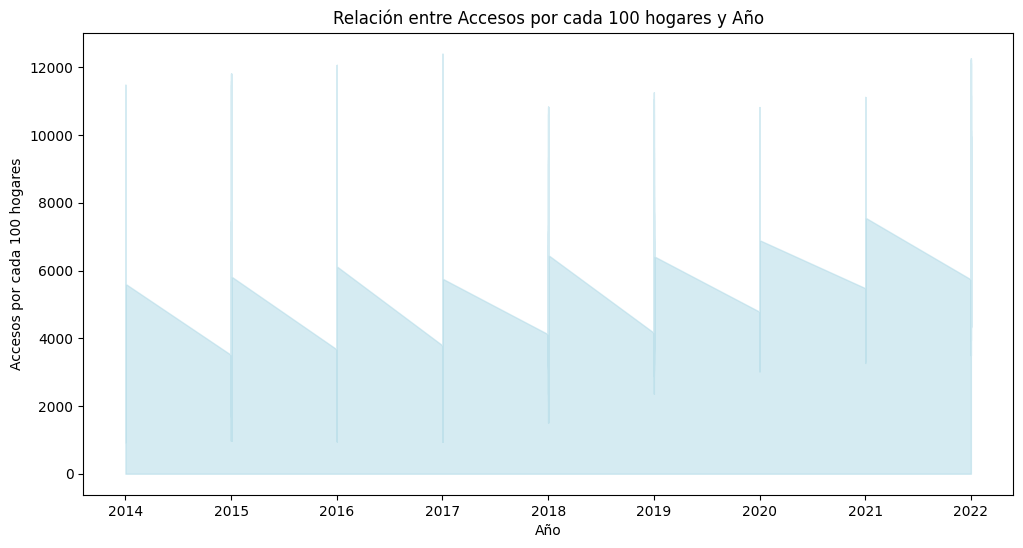

In [45]:
# Analizar la relación entre 'Accesos por cada 100 hogares' y 'Año' utilizando un gráfico de área acumulativa.

plt.figure(figsize=(12, 6))
plt.fill_between(df['Anio'], df['accesos_hogares'], color='lightblue', alpha=0.5)

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Relación entre Accesos por cada 100 hogares y Año')

# Mostrar el gráfico
plt.show()


El gráfico representa la relación entre el año y la cantidad de accesos por cada 100 hogares desde el año 2014 al 2022.
Se observa una tendencia positiva que indica un aumento en la cantidad de accesos por cada 100 hogares año tras año.

#### Relación entre 'Accesos por cada 100 hogares' y 'Provincia'

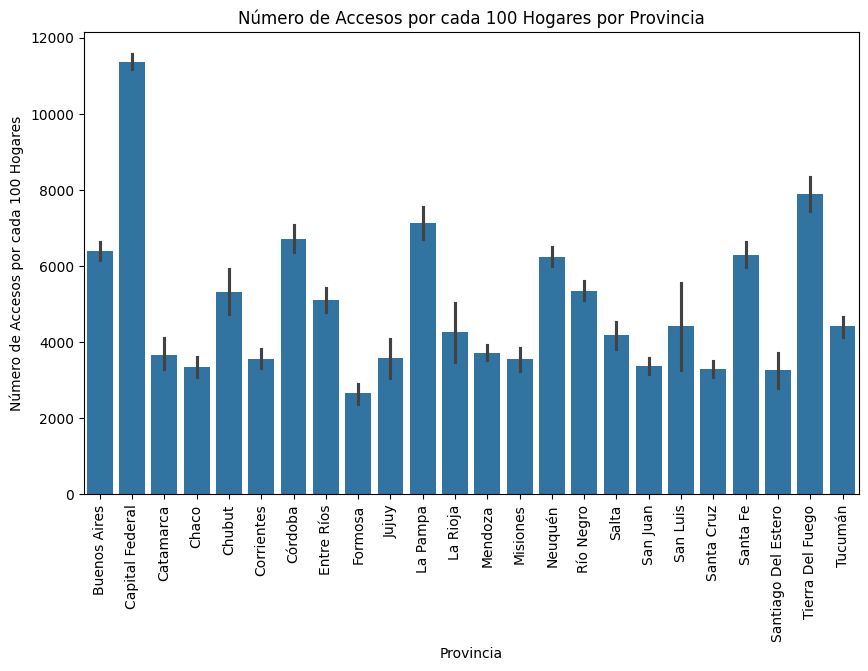

In [54]:

# Gráfico de barras de 'Provincia' vs 'accesos_hogares'
plt.figure(figsize=(10, 6))
sns.barplot(x='Provincia', y='accesos_hogares', data=df)
plt.xlabel('Provincia')
plt.ylabel('Número de Accesos por cada 100 Hogares')
plt.title('Número de Accesos por cada 100 Hogares por Provincia')
plt.xticks(rotation=90)
plt.show()


El gráfico de barras muestra el número de accesos por cada 100 hogares para cada provincia. Es evidente que algunas provincias tienen números significativamente más altos de accesos de hogares en comparación con otras.

#### Relación entre 'Accesos por cada 100 hogares' y 'Velocidad Promedio de Descarga'

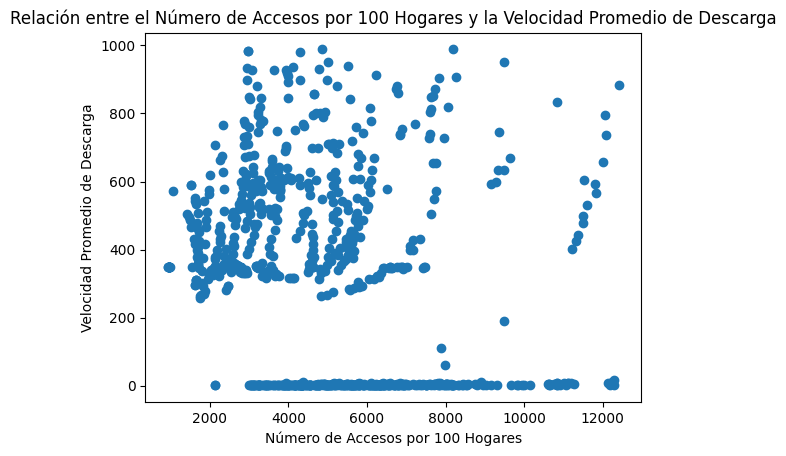

In [7]:

# Crear visualizaciones para explorar las relaciones entre variables
# Diagrama de dispersión de 'accesos_hogares' vs 'vel_media_bajada'
plt.scatter(df['accesos_hogares'], df['vel_media_bajada'])
plt.xlabel('Número de Accesos por 100 Hogares')
plt.ylabel('Velocidad Promedio de Descarga')
plt.title('Relación entre el Número de Accesos por 100 Hogares y la Velocidad Promedio de Descarga')
plt.show()


Existe una relación positiva entre el número de accesos por cada 100 hogares y la velocidad promedio de descarga. A medida que aumenta el número de accesos por cada 100 hogares, la velocidad promedio de descarga también tiende a aumentar.

#### Distribución: Velocidad Promedio de Descarga

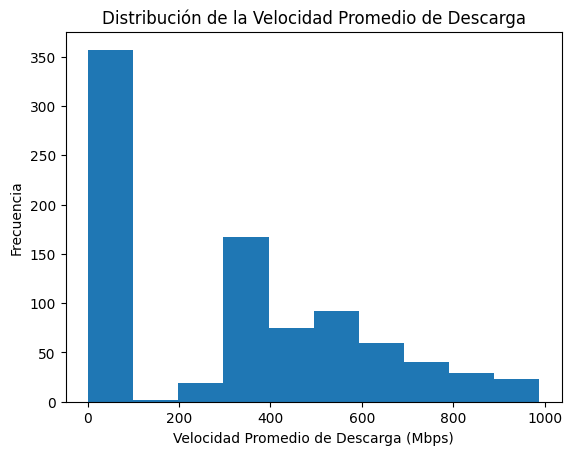

In [56]:
# Histograma de Velocidad Promedio de Descarga (Mbps)
plt.hist(df['velocidad_bajada'], bins=10)
plt.xlabel('Velocidad Promedio de Descarga (Mbps)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Velocidad Promedio de Descarga')
plt.show()


El histograma muestra la distribución de velocidades promedio de descarga. La mayoría de las velocidades promedio de descarga caen dentro de un rango específico, lo que indica un rango de velocidad común para los hogares.

#### Relación entre 'Año' vs 'Accesos por cada 100 hogares' para cada 'Provincia'

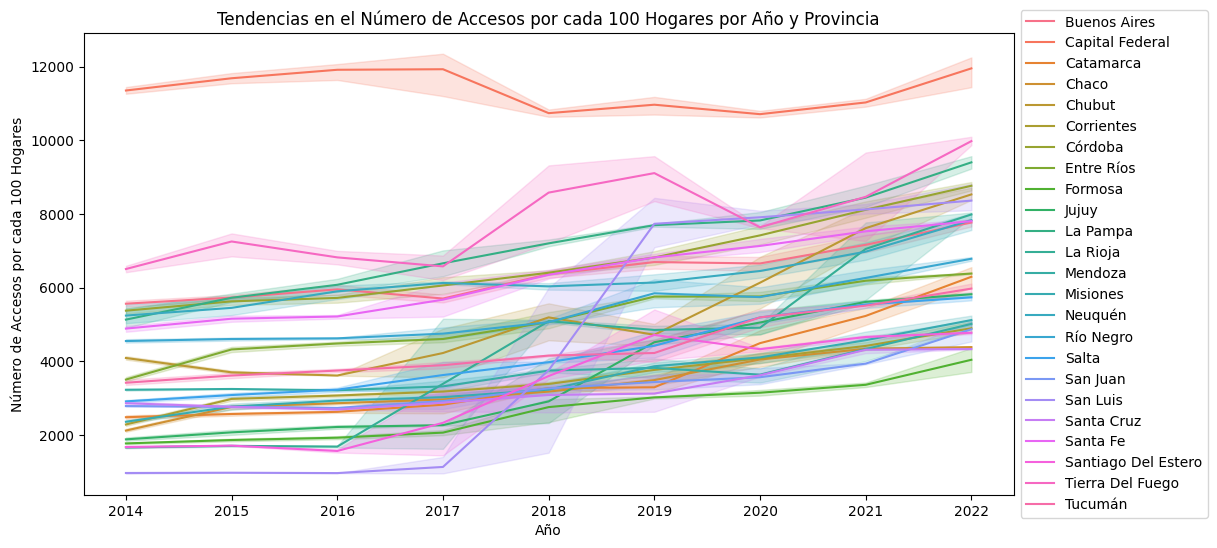

In [57]:
# Analizar cualquier tendencia o patrón en los datos
# Gráfico de líneas de 'Año' vs 'Accesos por cada 100 hogares' para cada 'Provincia'
plt.figure(figsize=(12, 6))
sns.lineplot(x='Anio', y='accesos_hogares', hue='Provincia', data=df)
plt.xlabel('Año')
plt.ylabel('Número de Accesos por cada 100 Hogares')
plt.title('Tendencias en el Número de Accesos por cada 100 Hogares por Año y Provincia')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


El gráfico de líneas nos permite analizar las tendencias en el número de accesos de hogares a lo largo de los años para cada provincia. Proporciona información sobre cómo ha cambiado el número de accesos de hogares con el tiempo y si hay variaciones entre provincias.

#### Analisis sobre las variaciones de los 'Accesos por cada 100 hogares' a lo largo de los diferentes trimestres

In [58]:
# Agrupa el dataframe 'df' por 'Trimestre' y calcula las estadísticas necesarias para 'accesos_hogares'

df_trimestre_stats = df.groupby('Trimestre')['accesos_hogares'].agg(['mean', 'median', 'min', 'max', 'std'])
df_trimestre_stats

,mean,median,min,max,std
Trimestre,,,,,
1,4764.611111,4448.5,935,11516,2269.715871
2,4909.115741,4570.5,951,12406,2350.754078
3,5074.805556,4708.0,963,12228,2350.413865
4,5099.587963,4797.0,964,12290,2356.126139


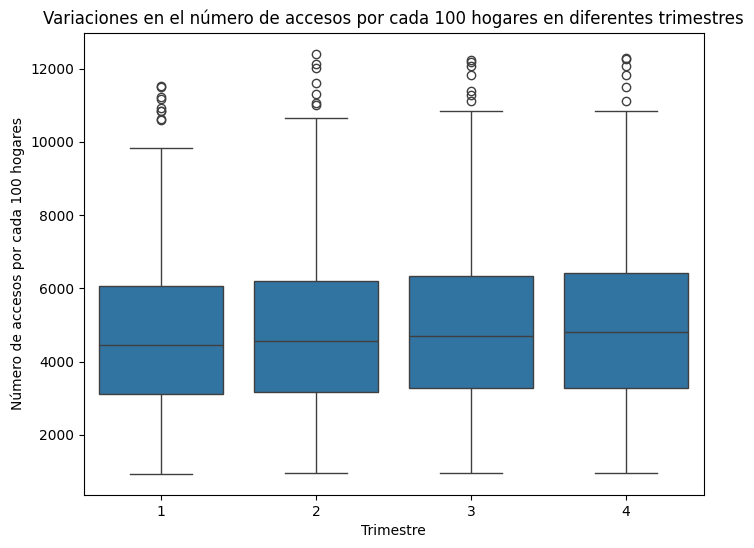

In [59]:
# Visualiza los 'Accesos por cada 100 hogares' en diferentes 'Trimestre' utilizando un box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Trimestre', y='accesos_hogares', data=df)
plt.xlabel('Trimestre')
plt.ylabel('Número de accesos por cada 100 hogares')
plt.title('Variaciones en el número de accesos por cada 100 hogares en diferentes trimestres')
plt.show()

Conclusiones:

- El número promedio de accesos de hogares es mayor en el Trimestre 4, seguido por el Trimestre 3, Trimestre 2 y Trimestre 1.
- La mediana del número de accesos de hogares es similar en todos los trimestres.
- El número mínimo y máximo de accesos de hogares varía entre trimestres, indicando fluctuaciones en la demanda.
- La desviación estándar del número de accesos de hogares es mayor en el Trimestre 4, lo que sugiere una mayor variabilidad en los datos para ese trimestre.

#### Analisis sobre Tecnologías de Conexión por Provincia

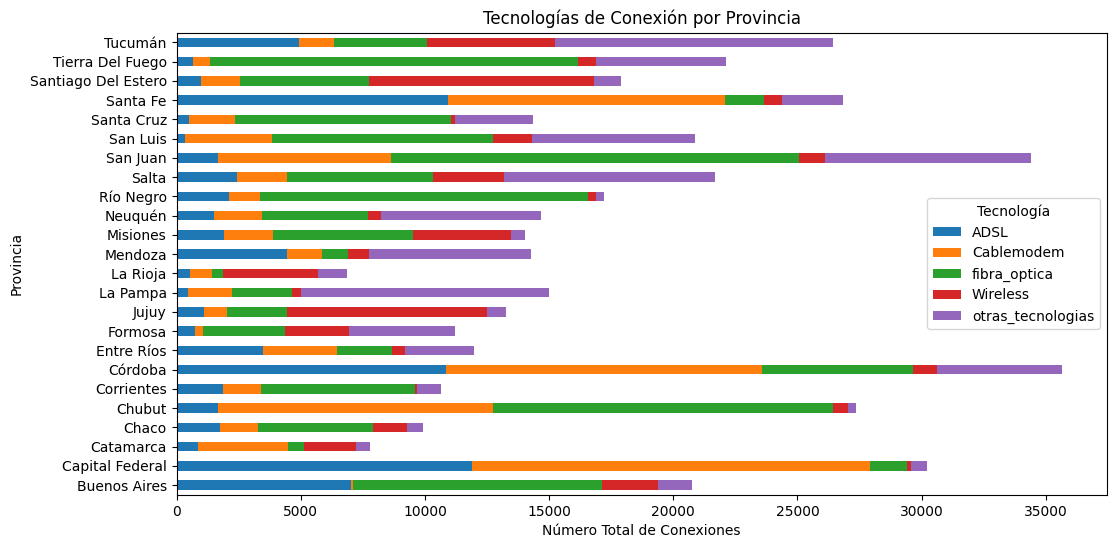

In [67]:
# Agrupando los datos por 'Provincia' y calculando la suma de cada tecnología de conexión
datos_agrupados = df.groupby('Provincia', observed=False)[['ADSL', 'Cablemodem', 'fibra_optica', 'Wireless', 'otras_tecnologias']].sum()

# Creando un gráfico de barras apiladas para visualizar los datos
datos_agrupados.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.xlabel('Número Total de Conexiones')
plt.ylabel('Provincia')
plt.title('Tecnologías de Conexión por Provincia')
plt.legend(title='Tecnología')
plt.show()

Analizando los datos y sacando conclusiones:

In [68]:
# Identificando provincias con el mayor número de conexiones para cada tecnología
mayores_conexiones = datos_agrupados.idxmax()
print("Provincias con el mayor número de conexiones para cada tecnología:")
print(mayores_conexiones)

Provincias con el mayor número de conexiones para cada tecnología:
ADSL                     Capital Federal
Cablemodem               Capital Federal
fibra_optica                    San Juan
Wireless             Santiago Del Estero
otras_tecnologias                Tucumán
dtype: category
Categories (24, object): ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', ..., 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán']


In [69]:
# Comparando la distribución de tecnologías entre provincias
distribucion_tecnologias = datos_agrupados.sum()
print("Distribución de tecnologías entre provincias:")
display(distribucion_tecnologias)

Distribución de tecnologías entre provincias:


ADSL                  74618
Cablemodem            89244
fibra_optica         142934
Wireless              49920
otras_tecnologias     88744
dtype: int64

### 6. Fuentes adicionales <a name="id6"></a>
Además del análisis inicial de datos, se recurrió a fuentes suplementarias para obtener información adicional.

Tipos de acceso a internet https://www.enacom.gob.ar/tipos-de-conexion_p112
